### Drawing network diagrams of the _C. elegans_ connectome
---
*Last updated: 1 July 2024*

In all animals, neurons transmit signals through two main types of synaptic connections: chemical synapses and electrical synapses, the latter also known as gap junctions. Chemical synapses are morphologically and functionally asymmetric junctions formed between a neuron and its targets (neuron or muscle). In contrast, electrical synapses or gap junctions are morphologically symmetrical, defined by two electron-dense membranes that can be as narrow as 2–3 nm apart.

In [10]:
# imports
import os
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from utils import ROOT_DIR, NEURON_LABELS
from visualize._utils import draw_connectome
from torch_geometric.utils import to_dense_adj, to_networkx

In [11]:
# load the connectome data

connectome_pt_files = [
    "graph_tensors.pt",
    "graph_tensors_witvliet2020_7.pt",
    "graph_tensors_witvliet2020_8.pt",
    "graph_tensors_cook2019.pt",
    "graph_tensors_chklovskii.pt",
    "graph_tensors_openworm.pt",
    "graph_tensors_funconn.pt",
    "graph_tensors_white1986_n2u.pt",
    "graph_tensors_white1986_jsh.pt",
    "graph_tensors_white1986_jse.pt",
    "graph_tensors_white1986_whole.pt",
]

# load each connectome and print basic info on it
for pt_file in connectome_pt_files:
    print("~" * 50 + f"\nConnectome loaded from {pt_file}\n")

    # load the tensors
    graph_tensors = torch.load(os.path.join(ROOT_DIR, "data", "processed", "connectome", pt_file))

    # make the graph
    graph = Data(**graph_tensors)

    # investigate the graph
    print(
        # "Attributes:",
        # "\n",
        # graph.keys,
        # "\n",
        f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, "
        f"Num. node features {graph.num_node_features}",
        end="\n",
    )
    print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
    print(f"\tHas self-loops: {graph.has_self_loops()}")
    print(f"\tIs undirected: {graph.is_undirected()}")
    print(f"\tIs directed: {graph.is_directed()}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Connectome loaded from graph_tensors.pt

Num. nodes 300, Num. edges 47344, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Connectome loaded from graph_tensors_witvliet2020_7.pt

Num. nodes 300, Num. edges 46057, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Connectome loaded from graph_tensors_witvliet2020_8.pt

Num. nodes 300, Num. edges 46107, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Connectome loaded from graph_tensors_cook2019.pt

Num. nodes 300, Num. edges 46837, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True
~

In [14]:
G = to_networkx(graph)
print(G.nodes)
print(graph.node_label)
print(graph.node_class)
print(graph.node_type)
print(graph.y)

motor_neurons = []
inter_neurons = []
sensory_neurons = []
pharynx_neurons = []

for i, label in enumerate(graph.node_label.values()):
    if graph.y[i] == 0:
        inter_neurons += [label]
    if graph.y[i] == 1:
        motor_neurons += [label]
    if graph.y[i] == 2:
        pharynx_neurons += [label]
    if graph.y[i] == 3:
        sensory_neurons += [label]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [4]:
graph_tensors.keys()

dict_keys(['edge_index', 'edge_attr', 'pos', 'num_classes', 'x', 'y', 'node_type', 'node_label', 'n_id', 'node_class'])

In [13]:
graph_tensors["x"]

tensor([[9.2865e-04, 5.0135e+33, 4.5196e+30,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [15]:
inter_neurons += ["" for i in range(len(motor_neurons) - len(inter_neurons))]
sensory_neurons += ["" for i in range(len(motor_neurons) - len(sensory_neurons))]
pharynx_neurons += ["" for i in range(len(motor_neurons) - len(pharynx_neurons))]

In [18]:
for motor, inter, sensory, pharynx in zip(
    motor_neurons, inter_neurons, sensory_neurons, pharynx_neurons
):
    print(motor + " & " + inter + " & " + sensory + " & " + pharynx + " \\\\")

AS1 & ADAL & ADEL & I1L \\
AS10 & ADAR & ADER & I1R \\
AS11 & AIAL & ADFL & I2L \\
AS2 & AIAR & ADFR & I2R \\
AS3 & AIBL & ADLL & I3 \\
AS4 & AIBR & ADLR & I4 \\
AS5 & AIML & AFDL & I5 \\
AS6 & AIMR & AFDR & I6 \\
AS7 & AINL & ALA & M1 \\
AS8 & AINR & ALML & M2L \\
AS9 & AIYL & ALMR & M2R \\
AVL & AIYR & ALNL & M3L \\
DA1 & AIZL & ALNR & M3R \\
DA2 & AIZR & AQR & M4 \\
DA3 & AUAL & ASEL & M5 \\
DA4 & AUAR & ASER & MCL \\
DA5 & AVAL & ASGL & MCR \\
DA6 & AVAR & ASGR & MI \\
DA7 & AVBL & ASHL & NSML \\
DA8 & AVBR & ASHR & NSMR \\
DA9 & AVDL & ASIL &  \\
DB1 & AVDR & ASIR &  \\
DB2 & AVEL & ASJL &  \\
DB3 & AVER & ASJR &  \\
DB4 & AVFL & ASKL &  \\
DB5 & AVFR & ASKR &  \\
DB6 & AVG & AVM &  \\
DB7 & AVHL & AWAL &  \\
DD1 & AVHR & AWAR &  \\
DD2 & AVJL & AWBL &  \\
DD3 & AVJR & AWBR &  \\
DD4 & AVKL & AWCL &  \\
DD5 & AVKR & AWCR &  \\
DD6 & BDUL & BAGL &  \\
DVB & BDUR & BAGR &  \\
HSNL & DVA & CEPDL &  \\
HSNR & DVC & CEPDR &  \\
PDA & LUAL & CEPVL &  \\
PDB & LUAR & CEPVR &  \\
RIML & P

In [14]:
graph.y

sensory_neurons = []

for i, type in enumerate(graph.y):
    if type == 3:
        sensory_neurons += [i]

len(sensory_neurons)

85

In [15]:
graph.node_label

sensory_neuron_names = []

for neuron in sensory_neurons:
    sensory_neuron_names += [graph.node_label[neuron]]

sensory_neuron_names

['ADEL',
 'ADER',
 'ADFL',
 'ADFR',
 'ADLL',
 'ADLR',
 'AFDL',
 'AFDR',
 'ALA',
 'ALML',
 'ALMR',
 'ALNL',
 'ALNR',
 'AQR',
 'ASEL',
 'ASER',
 'ASGL',
 'ASGR',
 'ASHL',
 'ASHR',
 'ASIL',
 'ASIR',
 'ASJL',
 'ASJR',
 'ASKL',
 'ASKR',
 'AVM',
 'AWAL',
 'AWAR',
 'AWBL',
 'AWBR',
 'AWCL',
 'AWCR',
 'BAGL',
 'BAGR',
 'CEPDL',
 'CEPDR',
 'CEPVL',
 'CEPVR',
 'FLPL',
 'FLPR',
 'IL1DL',
 'IL1DR',
 'IL1L',
 'IL1R',
 'IL1VL',
 'IL1VR',
 'IL2DL',
 'IL2DR',
 'IL2L',
 'IL2R',
 'IL2VL',
 'IL2VR',
 'OLLL',
 'OLLR',
 'OLQDL',
 'OLQDR',
 'OLQVL',
 'OLQVR',
 'PDEL',
 'PDER',
 'PHAL',
 'PHAR',
 'PHBL',
 'PHBR',
 'PHCL',
 'PHCR',
 'PLML',
 'PLMR',
 'PQR',
 'PVDL',
 'PVDR',
 'PVM',
 'URADL',
 'URADR',
 'URAVL',
 'URAVR',
 'URBL',
 'URBR',
 'URXL',
 'URXR',
 'URYDL',
 'URYDR',
 'URYVL',
 'URYVR']

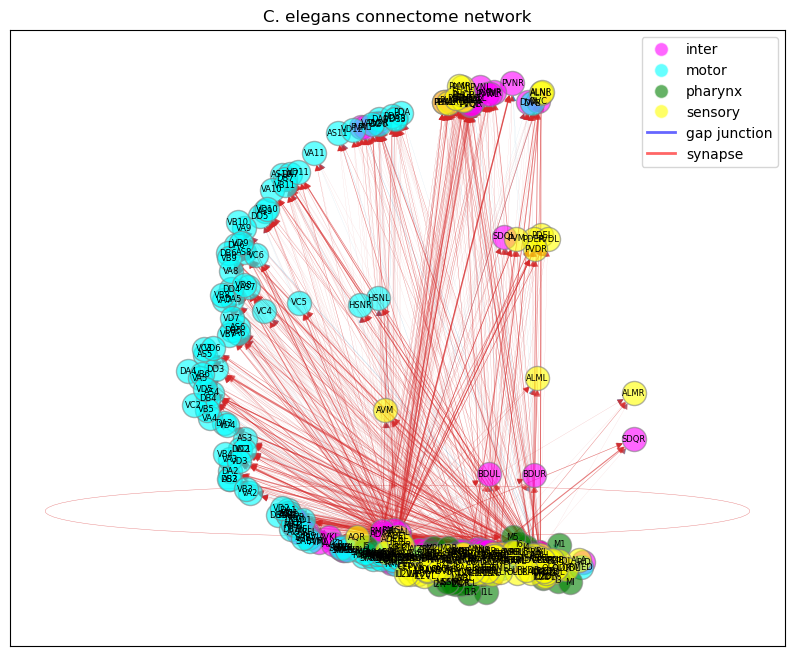

In [6]:
# # enable interactive plotting in Jupyter
# %matplotlib widget

# draw the connectome
draw_connectome(graph, plot_3d=False)
# draw_connectome(graph, plot_3d=True)

tensor([0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
        3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 3, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
        0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

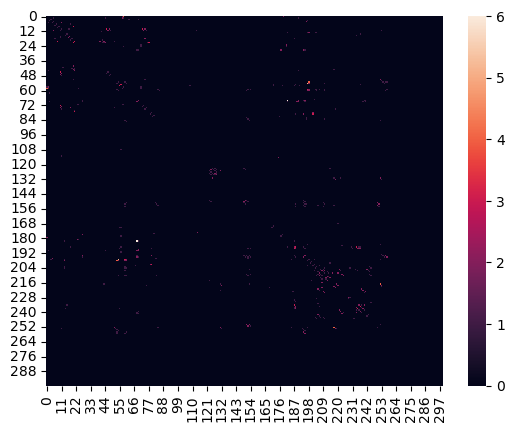

torch.Size([300, 300])


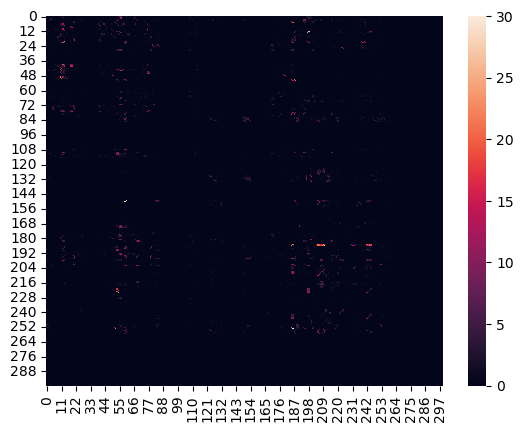

In [4]:
### DEBUG ###

# Test the gap junctions and chemical synapses are symmetric and asymmetric, respectively

print(graph.y)
print(graph.num_nodes)


gap_junctions = to_dense_adj(edge_index=graph.edge_index, edge_attr=graph.edge_attr[:, 0]).squeeze(
    0
)
print(gap_junctions.shape)
sns.heatmap(gap_junctions)
plt.show()


chemical_synapses = to_dense_adj(
    edge_index=graph.edge_index, edge_attr=graph.edge_attr[:, 1]
).squeeze(0)
print(chemical_synapses.shape)
sns.heatmap(chemical_synapses)
plt.show()


assert torch.allclose(
    gap_junctions.T, gap_junctions
), "Gap junction connectome is an undirected graph and thus should be symmetric!"  # the gap junctions are symmetric
assert not torch.allclose(
    chemical_synapses.T, chemical_synapses
), "Chemical synapse connectome a directed graph and thus should asymmetric!"  # the chemical synapses are not symmetric

### DEBUG ###